# Shallow Neuron Network (One hidden layer): Planar circle Data Classification


**1 - Packages**

In [2]:
#1.  Lets first import all the necessary packages
!pip install mlxtend  
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import sklearn.linear_model
from mlxtend.plotting import plot_decision_regions

%matplotlib inline

np.random.seed(1) # set a seed so that the results are consistent

**2- Dataset**

In [36]:
#2. Loading dataset
X,Y= sklearn.datasets.make_circles(n_samples=100,noise=0.1)
X = X.T;
Y = np.reshape(Y, (-1, 1)).T;
print(X.shape)
print(Y.shape)


(2, 100)
(1, 100)


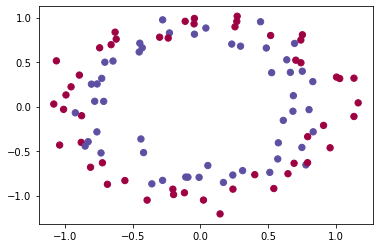

In [37]:
#3. Visualizing the data
plt.scatter(X[0, :], X[1, :], c=Y[0], s=40, cmap=plt.cm.Spectral);

We have a numpy-array (matrix) X that contains our features (x1, x2) and a numpy-array (vector) Y that contains our labels (red:0, blue:1).

Lets first get a better sense of what our data is like.

In [38]:
### START CODE HERE ### (≈ 3 lines of code)
shape_X = X.shape
shape_Y = Y.shape
m = X.shape[1]
### END CODE HERE ###

print ('The shape of X is: ' + str(shape_X))
print ('The shape of Y is: ' + str(shape_Y))
print ('I have m = %d training examples!' % (m))

The shape of X is: (2, 100)
The shape of Y is: (1, 100)
I have m = 100 training examples!


**3 - Simple Logistic Regression** <BR>
Before building a full neural network, applying logistic regression to check, how it works on our data.


In [39]:
# Train the logistic regression classifier
clf = sklearn.linear_model.LogisticRegressionCV();
clf.fit(X.T, Y.T);

C:\Users\abc\anaconda2\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


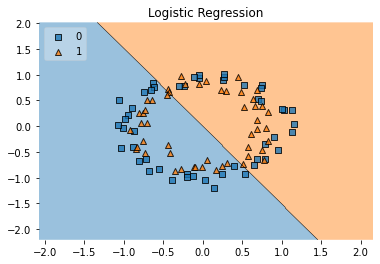

In [40]:
# Ploting the decision boundary for logistic regression
plot_decision_regions(X.T, Y.T.ravel(), clf=clf, res=0.02, legend=2)
plt.title("Logistic Regression")
plt.show();

# Print accuracy
LR_predictions = clf.predict(X.T)

In [41]:
print ('Accuracy of logistic regression: %d ' % float((np.dot(Y, LR_predictions) + np.dot(1 - Y,1 - LR_predictions)) / float(Y.size) * 100) +
       '% ' + "(percentage of correctly labelled datapoints)")

Accuracy of logistic regression: 52 % (percentage of correctly labelled datapoints)


**Interpretation:** The dataset is not linearly separable, so logistic regression doesn't perform well. Hopefully a neural network will do better. 

# Starting with Neural Networks...

Logistic regression did not work well on the "circle dataset".Therefore, we are going to train a Neural Network with a single hidden layer.


**4.1 - Defining the neural network structure** <BR>
We started with defining three variables: - n_x: the size of the input layer - n_h: the size of the hidden layer (set this to 4) - n_y: the size of the output layer


In [42]:
# GRADED FUNCTION: layer_sizes

def layer_sizes(X, Y):
    # Arguments:
    # X -- input dataset of shape (input size, number of examples)
    # Y -- labels of shape (output size, number of examples)
    
    n_x = X.shape[0] # size of input layer
    n_h = 4
    n_y = Y.shape[0] # size of output layer
    ### END CODE HERE ###
    return (n_x, n_h, n_y)

In [44]:
X_assess, Y_assess = layer_sizes_test_case()
(n_x, n_h, n_y) = layer_sizes(X_assess, Y_assess)
print("The size of the input layer is: n_x = " + str(n_x))
print("The size of the hidden layer is: n_h = " + str(n_h))
print("The size of the output layer is: n_y = " + str(n_y))

The size of the input layer is: n_x = 5
The size of the hidden layer is: n_h = 4
The size of the output layer is: n_y = 1


**4.2 - Initialize the model's parameters**

You will initialize the weights matrices with random values. <BR>
Use: np.random.randn(a,b) * 0.01 to randomly initialize a matrix of shape (a,b). <BR>
You will initialize the bias vectors as zeros.<BR>
Use: np.zeros((a,b)) to initialize a matrix of shape (a,b) with zeros.

In [45]:
# GRADED FUNCTION: initialize_parameters

def initialize_parameters(n_x, n_h, n_y):
    """
    Argument:
    n_x -- size of the input layer
    n_h -- size of the hidden layer
    n_y -- size of the output layer
    
    Returns:
    params -- python dictionary containing your parameters:
                    W1 -- weight matrix of shape (n_h, n_x)
                    b1 -- bias vector of shape (n_h, 1)
                    W2 -- weight matrix of shape (n_y, n_h)
                    b2 -- bias vector of shape (n_y, 1)
    """
    
    np.random.seed(2) # we set up a seed so that your output matches ours although the initialization is random.
    
    ### START CODE HERE ### (≈ 4 lines of code)
    W1 = np.random.randn(n_h, n_x) * 0.01
    b1 = np.zeros((n_h, 1))
    W2 = np.random.randn(n_y, n_h) * 0.01
    b2 = np.zeros((n_y,1))
    ### END CODE HERE ###
    
    assert (W1.shape == (n_h, n_x))
    assert (b1.shape == (n_h, 1))
    assert (W2.shape == (n_y, n_h))
    assert (b2.shape == (n_y, 1))
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [47]:
n_x, n_h, n_y = initialize_parameters_test_case()

parameters = initialize_parameters(n_x, n_h, n_y)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[-0.00416758 -0.00056267]
 [-0.02136196  0.01640271]
 [-0.01793436 -0.00841747]
 [ 0.00502881 -0.01245288]]
b1 = [[0.]
 [0.]
 [0.]
 [0.]]
W2 = [[-0.01057952 -0.00909008  0.00551454  0.02292208]]
b2 = [[0.]]


**4.3 - The Loop** <BR>
Implement forward_propagation().

In [48]:
# sigmoid

def sigmoid(z):
    """
    Compute the sigmoid of z

    Arguments:
    x -- A scalar or numpy array of any size.

    Return:
    s -- sigmoid(z)
    """
    s = 1 / (1 + np.exp(-z))

    return s

In [49]:
# GRADED FUNCTION: forward_propagation

def forward_propagation(X, parameters):
    """
    Argument:
    X -- input data of size (n_x, m)
    parameters -- python dictionary containing your parameters (output of initialization function)
    
    Returns:
    A2 -- The sigmoid output of the second activation
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2"
    """
    # Retrieve each parameter from the dictionary "parameters"
    ### START CODE HERE ### (≈ 4 lines of code)
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    ### END CODE HERE ###
    
    # Implement Forward Propagation to calculate A2 (probabilities)
    ### START CODE HERE ### (≈ 4 lines of code)
    Z1 = np.dot(W1, X) + b1
    A1 =  np.tanh(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)
    ### END CODE HERE ###
    
    assert(A2.shape == (1, X.shape[1]))
    
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    
    return A2, cache

In [50]:
def forward_propagation_test_case():
    X_assess, Y_assess = layer_sizes_test_case();
    parameters = initialize_parameters(5, 4, 1)
    return X_assess, parameters

In [51]:
X_assess, parameters = forward_propagation_test_case()

A2, cache = forward_propagation(X_assess, parameters)

# Note: we use the mean here just to make sure that your output matches ours. 
print(np.mean(cache['Z1']), np.mean(cache['A1']), np.mean(cache['Z2']), np.mean(cache['A2']))

-0.0012527585449975318 -0.0012531998877107708 -6.892566042919508e-05 0.4999827685850393


Implement compute_cost() to compute the value of the cost  J .


In [52]:
# GRADED FUNCTION: compute_cost

def compute_cost(A2, Y, parameters):
    """
    Computes the cross-entropy cost given in equation (13)
    
    Arguments:
    A2 -- The sigmoid output of the second activation, of shape (1, number of examples)
    Y -- "true" labels vector of shape (1, number of examples)
    parameters -- python dictionary containing your parameters W1, b1, W2 and b2
    
    Returns:
    cost -- cross-entropy cost given equation (13)
    """
    
    m = Y.shape[1] # number of example

    # Compute the cross-entropy cost
    ### START CODE HERE ### (≈ 2 lines of code)
    logprobs = np.multiply(np.log(A2),Y) +  np.multiply(np.log(1-A2), (1-Y))
    cost = -1/m*np.sum(logprobs)
    ### END CODE HERE ###
    
    cost = np.squeeze(cost)     # makes sure cost is the dimension we expect. 
                                # E.g., turns [[17]] into 17 
    assert(isinstance(cost, float))
    
    return cost

In [53]:
def compute_cost_test_case():
    A2 = np.ones((1,10))/2.0;
    Y_assess = np.concatenate((np.zeros((1,5)),np.ones((1,5))),axis=1);
    parameters = initialize_parameters(5, 4, 1);
    return A2, Y_assess, parameters

In [54]:
A2, Y_assess, parameters = compute_cost_test_case()

print("cost = " + str(compute_cost(A2, Y_assess, parameters)))

cost = 0.6931471805599454


Implement the function backward_propagation().


In [55]:
# GRADED FUNCTION: backward_propagation

def backward_propagation(parameters, cache, X, Y):
    """
    Implement the backward propagation using the instructions above.
    
    Arguments:
    parameters -- python dictionary containing our parameters 
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2".
    X -- input data of shape (2, number of examples)
    Y -- "true" labels vector of shape (1, number of examples)
    
    Returns:
    grads -- python dictionary containing your gradients with respect to different parameters
    """
    m = X.shape[1]
    
    # First, retrieve W1 and W2 from the dictionary "parameters".
    ### START CODE HERE ### (≈ 2 lines of code)
    W1 = parameters["W1"]
    W2 = parameters["W2"]
   
    ### END CODE HERE ###
        
    # Retrieve also A1 and A2 from dictionary "cache".
    ### START CODE HERE ### (≈ 2 lines of code)
    A1 = cache["A1"]
    A2 =  cache["A2"]
    ### END CODE HERE ###
    
    # Backward propagation: calculate dW1, db1, dW2, db2. 
    ### START CODE HERE ### (≈ 6 lines of code, corresponding to 6 equations on slide above)
    dZ2= A2-Y
    dW2 = 1./m*np.dot(dZ2, A1.T)
    db2 = 1./m*np.sum(dZ2, axis = 1, keepdims=True)
    dZ1 = np.dot(W2.T, dZ2) * (1 - np.power(A1, 2))
    dW1 = 1./m* np.dot(dZ1, X.T)
    db1 = 1./m*np.sum(dZ1, axis = 1, keepdims=True)
    ### END CODE HERE ###
    
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    
    return grads

In [56]:
def backward_propagation_test_case():
    X, parameters = forward_propagation_test_case()
    A2, cache = forward_propagation(X, parameters)
    Y = np.concatenate((np.zeros((1,5)),np.ones((1,5))),axis=1);
    np.random.shuffle(Y[0]);
    return parameters, cache, X, Y

In [57]:
parameters, cache, X_assess, Y_assess = backward_propagation_test_case()

grads = backward_propagation(parameters, cache, X_assess, Y_assess)
print ("dW1 = "+ str(grads["dW1"]))
print ("db1 = "+ str(grads["db1"]))
print ("dW2 = "+ str(grads["dW2"]))
print ("db2 = "+ str(grads["db2"]))

dW1 = [[ 7.13303754e-04 -2.86090069e-04  2.69839486e-04  4.83349622e-04
  -1.14231149e-03]
 [ 1.27047054e-04 -5.11594186e-05  4.80824121e-05  8.63649724e-05
  -2.03751744e-04]
 [-2.07322387e-04  8.41575901e-05 -7.87241739e-05 -1.41397662e-04
   3.34039637e-04]
 [ 8.03105764e-04 -3.23188643e-04  3.03788247e-04  5.45969037e-04
  -1.28767585e-03]]
db1 = [[ 7.38087443e-07]
 [ 1.80300045e-08]
 [-4.68161589e-07]
 [ 2.05825648e-07]]
dW2 = [[-0.00226315  0.00063123  0.00160882  0.00054182]]
db2 = [[-2.03394596e-05]]


Implement the update rule. Use gradient descent. You have to use (dW1, db1, dW2, db2) in order to update (W1, b1, W2, b2).

General gradient descent rule:  θ=θ−α∂J∂θ  where  α  is the learning rate and  θ  represents a parameter.

Illustration: The gradient descent algorithm with a good learning rate (converging) and a bad learning rate (diverging). Images courtesy of Adam Harley.

In [58]:
# GRADED FUNCTION: update_parameters

def update_parameters(parameters, grads, learning_rate = 1.2):
    """
    Updates parameters using the gradient descent update rule given above
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    grads -- python dictionary containing your gradients 
    
    Returns:
    parameters -- python dictionary containing your updated parameters 
    """
    # Retrieve each parameter from the dictionary "parameters"
    ### START CODE HERE ### (≈ 4 lines of code)
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    b1 = parameters["b1"]
    b2 = parameters["b2"]
    ### END CODE HERE ###
    
    # Retrieve each gradient from the dictionary "grads"
    ### START CODE HERE ### (≈ 4 lines of code)
    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]
    ## END CODE HERE ###
    
    # Update rule for each parameter
    ### START CODE HERE ### (≈ 4 lines of code)
    W1 = W1 - dW1 * learning_rate
    b1 = b1 - db1 * learning_rate
    W2 = W2 - dW2 * learning_rate
    b2 = b2 - db2 * learning_rate
    ### END CODE HERE ###
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [59]:
parameters, cache, X_assess, Y_assess = backward_propagation_test_case()
grads = backward_propagation(parameters, cache, X_assess, Y_assess)

parameters = update_parameters(parameters, grads)

print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[-0.00627707 -0.00063607 -0.01917302  0.01387401 -0.01542489]
 [-0.00879198  0.00501482 -0.01206191 -0.01103109 -0.00864219]
 [ 0.00612691  0.02294348 -0.00022762 -0.01044017  0.00465513]
 [-0.00832883 -0.000274    0.01422653 -0.01033045  0.00292455]]
b1 = [[ 3.95550704e-06]
 [ 4.82737357e-07]
 [ 5.54009632e-07]
 [-2.39810108e-07]]
W2 = [[ 0.00542457 -0.0008663  -0.00079444 -0.01644457]]
b2 = [[2.08034842e-05]]


**4.4 - Integrate parts 4.1, 4.2 and 4.3 in nn_model()** <BR>
Building our neural network model in nn_model().

In [60]:
# GRADED FUNCTION: nn_model

def nn_model(X, Y, n_h, num_iterations = 10000, print_cost=False):
    """
    Arguments:
    X -- dataset of shape (2, number of examples)
    Y -- labels of shape (1, number of examples)
    n_h -- size of the hidden layer
    num_iterations -- Number of iterations in gradient descent loop
    print_cost -- if True, print the cost every 1000 iterations
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """
    
    np.random.seed(3)
    n_x = layer_sizes(X, Y)[0]
    n_y = layer_sizes(X, Y)[2]
    
    # Initialize parameters, then retrieve W1, b1, W2, b2. Inputs: "n_x, n_h, n_y". Outputs = "W1, b1, W2, b2, parameters".
    ### START CODE HERE ### (≈ 5 lines of code)
    parameters = initialize_parameters(n_x, n_h, n_y)
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    b1 = parameters["b1"]
    b2 = parameters["b2"]
    ### END CODE HERE ###
    
    # Loop (gradient descent)

    for i in range(0, num_iterations):
         
        ### START CODE HERE ### (≈ 4 lines of code)
        # Forward propagation. Inputs: "X, parameters". Outputs: "A2, cache".
        A2, cache = forward_propagation(X, parameters)
        
        # Cost function. Inputs: "A2, Y, parameters". Outputs: "cost".
        cost = compute_cost(A2, Y, parameters)
 
        # Backpropagation. Inputs: "parameters, cache, X, Y". Outputs: "grads".
        grads = backward_propagation(parameters, cache, X, Y)
 
        # Gradient descent parameter update. Inputs: "parameters, grads". Outputs: "parameters".
        parameters = update_parameters(parameters, grads)
        
        ### END CODE HERE ###
        
        # Print the cost every 1000 iterations
        if print_cost and i % 1000 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))

    return parameters

In [62]:
X_assess, Y_assess = nn_model_test_case()

parameters = nn_model(X_assess, Y_assess, 4, num_iterations=10000, print_cost=False)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[ 0.40346069  0.4070656 ]
 [ 0.35478202  0.39254669]
 [-0.50997623 -0.50045935]
 [-0.54769587 -0.56517756]]
b1 = [[ 0.81525654]
 [ 0.75228796]
 [-0.98408375]
 [-1.10544936]]
W2 = [[-1.26299362 -1.12623201  1.71780839  2.07306421]]
b2 = [[-5.45620365]]


**4.5 Predictions**
 Use your model to predict by building predict(). Use forward propagation to predict results.

Reminder: predictions = $y_{prediction} = \mathbb 1 \text{{activation > 0.5}} = \begin{cases} 1 & \text{if}\ activation > 0.5
0 & \text{otherwise} \end{cases}$

As an example, if you would like to set the entries of a matrix X to 0 and 1 based on a threshold you would do: X_new = (X > threshold)

In [63]:
# GRADED FUNCTION: predict

def predict(parameters, X):
    """
    Using the learned parameters, predicts a class for each example in X
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    X -- input data of size (n_x, m)
    
    Returns
    predictions -- vector of predictions of our model (red: 0 / blue: 1)
    """
    
    # Computes probabilities using forward propagation, and classifies to 0/1 using 0.5 as the threshold.
    ### START CODE HERE ### (≈ 2 lines of code)
    A2, cache = forward_propagation(X, parameters)
    predictions = A2 > 0.5
    ### END CODE HERE ###
    
    return predictions

In [64]:
def predict_test_case():
    X_assess, Y_assess = nn_model_test_case()
    parameters = nn_model(X_assess, Y_assess, 4, num_iterations=10000, print_cost=False)
    return parameters, X_assess;

In [65]:
parameters, X_assess = predict_test_case()

predictions = predict(parameters, X_assess)
print("predictions mean = " + str(np.mean(predictions)))

predictions mean = 0.0


It is time to run the model and see how it performs on a planar dataset. Run the following code to test your model with a single hidden layer of  nh  hidden units.

Cost after iteration 0: 0.693147
Cost after iteration 1000: 0.693125
Cost after iteration 2000: 0.693121
Cost after iteration 3000: 0.693098
Cost after iteration 4000: 0.657169
Cost after iteration 5000: 0.434487
Cost after iteration 6000: 0.421675
Cost after iteration 7000: 0.707444
Cost after iteration 8000: 0.914055
Cost after iteration 9000: 0.338907


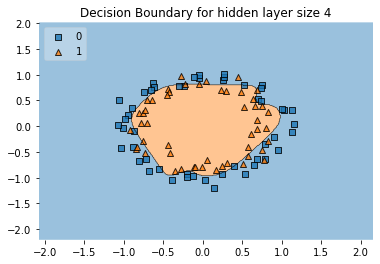

In [66]:
# Build a model with a n_h-dimensional hidden layer
parameters = nn_model(X, Y, n_h = 4, num_iterations=10000, print_cost=True)

class clf(object):
    @staticmethod
    def predict(x):
        global predict
        return predict(parameters, x.T)

# Plot the decision boundary
plot_decision_regions(X.T, Y.T.ravel(), clf=clf, res=0.02, legend=2)
plt.title("Decision Boundary for hidden layer size " + str(4))
plt.show();

In [67]:
# Print accuracy
predictions = predict(parameters, X)
print ('Accuracy: %d' % float((np.dot(Y, predictions.T) + np.dot(1 - Y, 1 - predictions.T)) / float(Y.size) * 100) + '%')

Accuracy: 82%


Accuracy is high compared to Logistic Regression. The model has learnt the circle patern! Neural networks are able to learn even highly non-linear decision boundaries, unlike logistic regression.

Now, let's try out several hidden layer sizes.

Tuning hidden layer size

Accuracy for 1 hidden units: 56.99999999999999 %
Accuracy for 2 hidden units: 65.0 %
Accuracy for 3 hidden units: 81.0 %
Accuracy for 4 hidden units: 76.0 %
Accuracy for 5 hidden units: 75.0 %
Accuracy for 20 hidden units: 57.99999999999999 %
Accuracy for 50 hidden units: 52.0 %


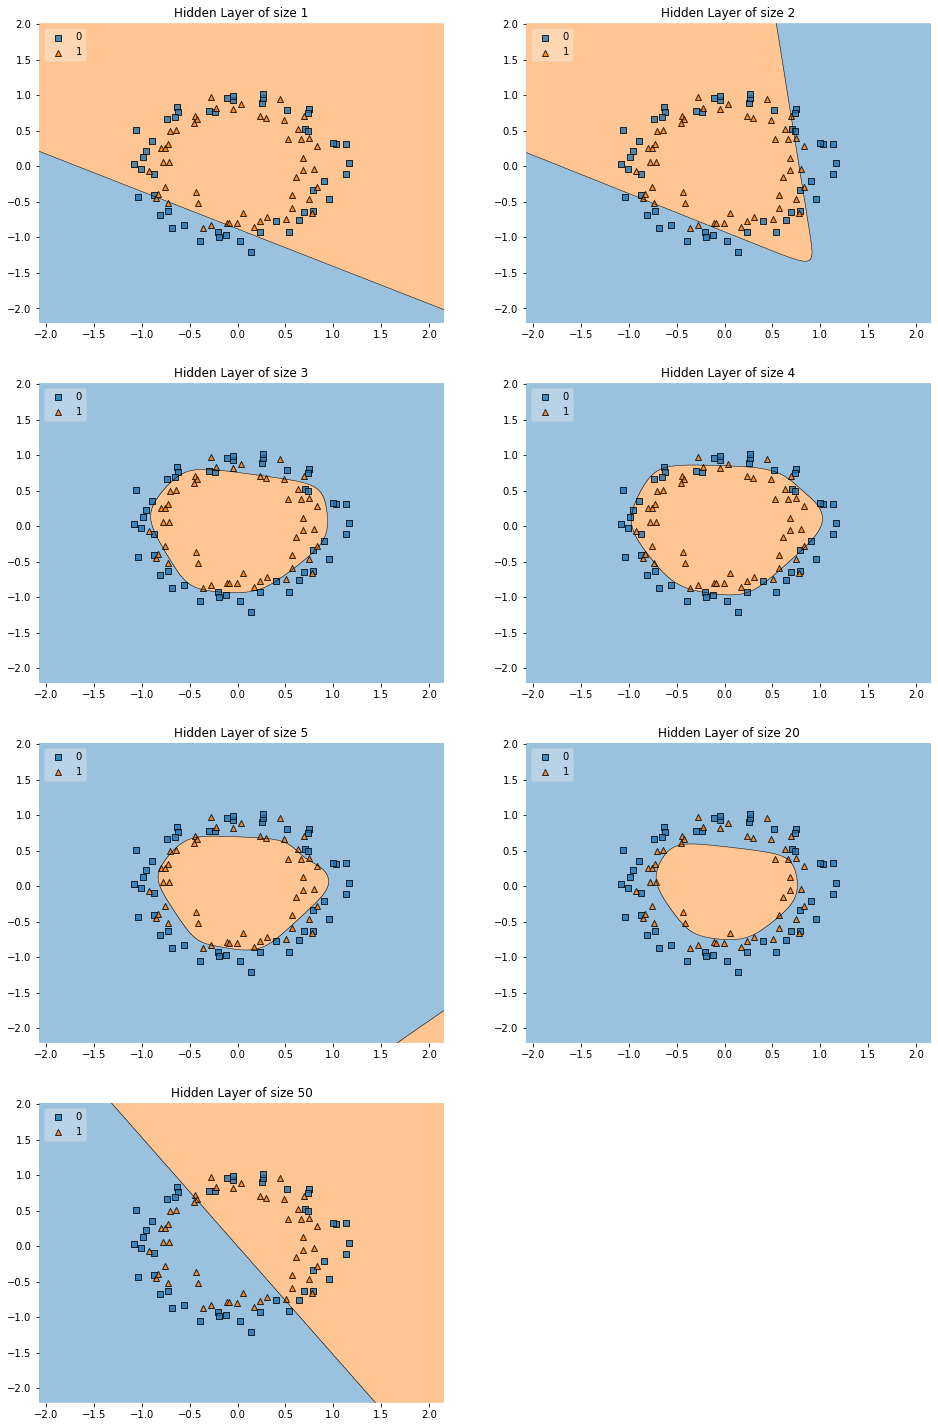

In [68]:
# This may take about 2 minutes to run

plt.figure(figsize=(16, 32))
hidden_layer_sizes = [1, 2, 3, 4, 5, 20, 50]
for i, n_h in enumerate(hidden_layer_sizes):
    plt.subplot(5, 2, i + 1)
    plt.title('Hidden Layer of size %d' % n_h)
    parameters = nn_model(X, Y, n_h, num_iterations=5000)
    plot_decision_regions(X.T, Y.T.ravel(), clf=clf, res=0.02, legend=2)
    predictions = predict(parameters, X)
    accuracy = float((np.dot(Y, predictions.T) + np.dot(1 - Y, 1 - predictions.T)) / float(Y.size) * 100)
    print ("Accuracy for {} hidden units: {} %".format(n_h, accuracy))

Interpretation:
<BR>
1. The larger models (with more hidden units) are able to fit the training set better, until eventually the largest models overfit the data. <BR>
2.The best hidden layer size seems to be around n_h = 5. Indeed, a value around here seems to fits the data well without also incurring noticable overfitting. <BR>
3. You will also learn later about regularization, which lets you use very large models (such as n_h = 50) without much overfitting. 

In [80]:
print("THANK YOU!!")

THANK YOU!!
